In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
route = './data/HISTORICO_SUERTES.xlsx'
df = pd.read_excel(route)

In [3]:
df_clean = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

In [4]:
df.head(3)

Período  Hacienda           Nombre  Zona  Tenencia Suerte       Suelo  \
0   201701     80493        LA CONCHA  IP02      51.0   002A   CANTARINA   
1   201701     81284  UKRANIA INCAUCA  IP05      81.0   039B         NaN   
2   201701     80203    EL AMPARO SAA  IP05      31.0    007  CORINTIAS    

   Area Neta  Dist Km   Variedad  ...  Humedad Rel Media Ciclo  \
0       6.00      4.3    CC85-92  ...                      NaN   
1       1.45      NaN    CC85-92  ...                      NaN   
2       8.24     23.0  CC01-1228  ...                      NaN   

  Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo Sum Oscilacion Temp Ciclo  \
0                     NaN                   NaN                       NaN   
1                     NaN                   NaN                       NaN   
2                     NaN                   NaN                       NaN   

  Radicion Solar 0-3  Radiacion Solar Ciclo Precipitacion 0_3  \
0                NaN                    NaN               NaN   
1                NaN                    NaN               NaN   
2                NaN                    NaN               NaN   

   Precipitacion Ciclo  Evaporacion 0-3 Evaporacion Ciclo  
0                  NaN              NaN               NaN  
1                  NaN              NaN               NaN  
2                  NaN              NaN               NaN  

[3 rows x 85 columns]

## **EDA y Regresión para TCH**

#### **Análisis de variables numéricas y categoricas**

In [5]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns
print(NUMERICAL_FEATURES)

Index(['Período', 'Hacienda', 'Tenencia', 'Area Neta', 'Dist Km',
       'Cod.Estado #', 'Edad Ult Cos', 'Destino 1=Semilla', 'Cod. T.Cultivo',
       'Dosis Madurante', 'Semanas mad.', 'TonUltCorte', 'TCH', 'TCHM',
       'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha',
       'Edad.Precosecha', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', 'KATRHM',
       '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix',
       'Pureza', 'Vejez', 'Num.Riegos', 'M3 Riego', 'DDUlt.Riego',
       'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3',
       'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC',
       '%Infest.Diatrea', 'Fosfato Jugo', 'Fert.Nitrogen.', 'Urea 46%', 'MEZ',
       'Boro Granul.', 'MicroZinc', 'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S',
       'Vinaza', 'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo',
       'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo',
       'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ci

In [6]:
CATEGORICAL_FEATURES = df.select_dtypes(include=["object", "category"]).columns
print(CATEGORICAL_FEATURES)

Index(['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'D.S.',
       'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó',
       'Codigo Estacion'],
      dtype='object')


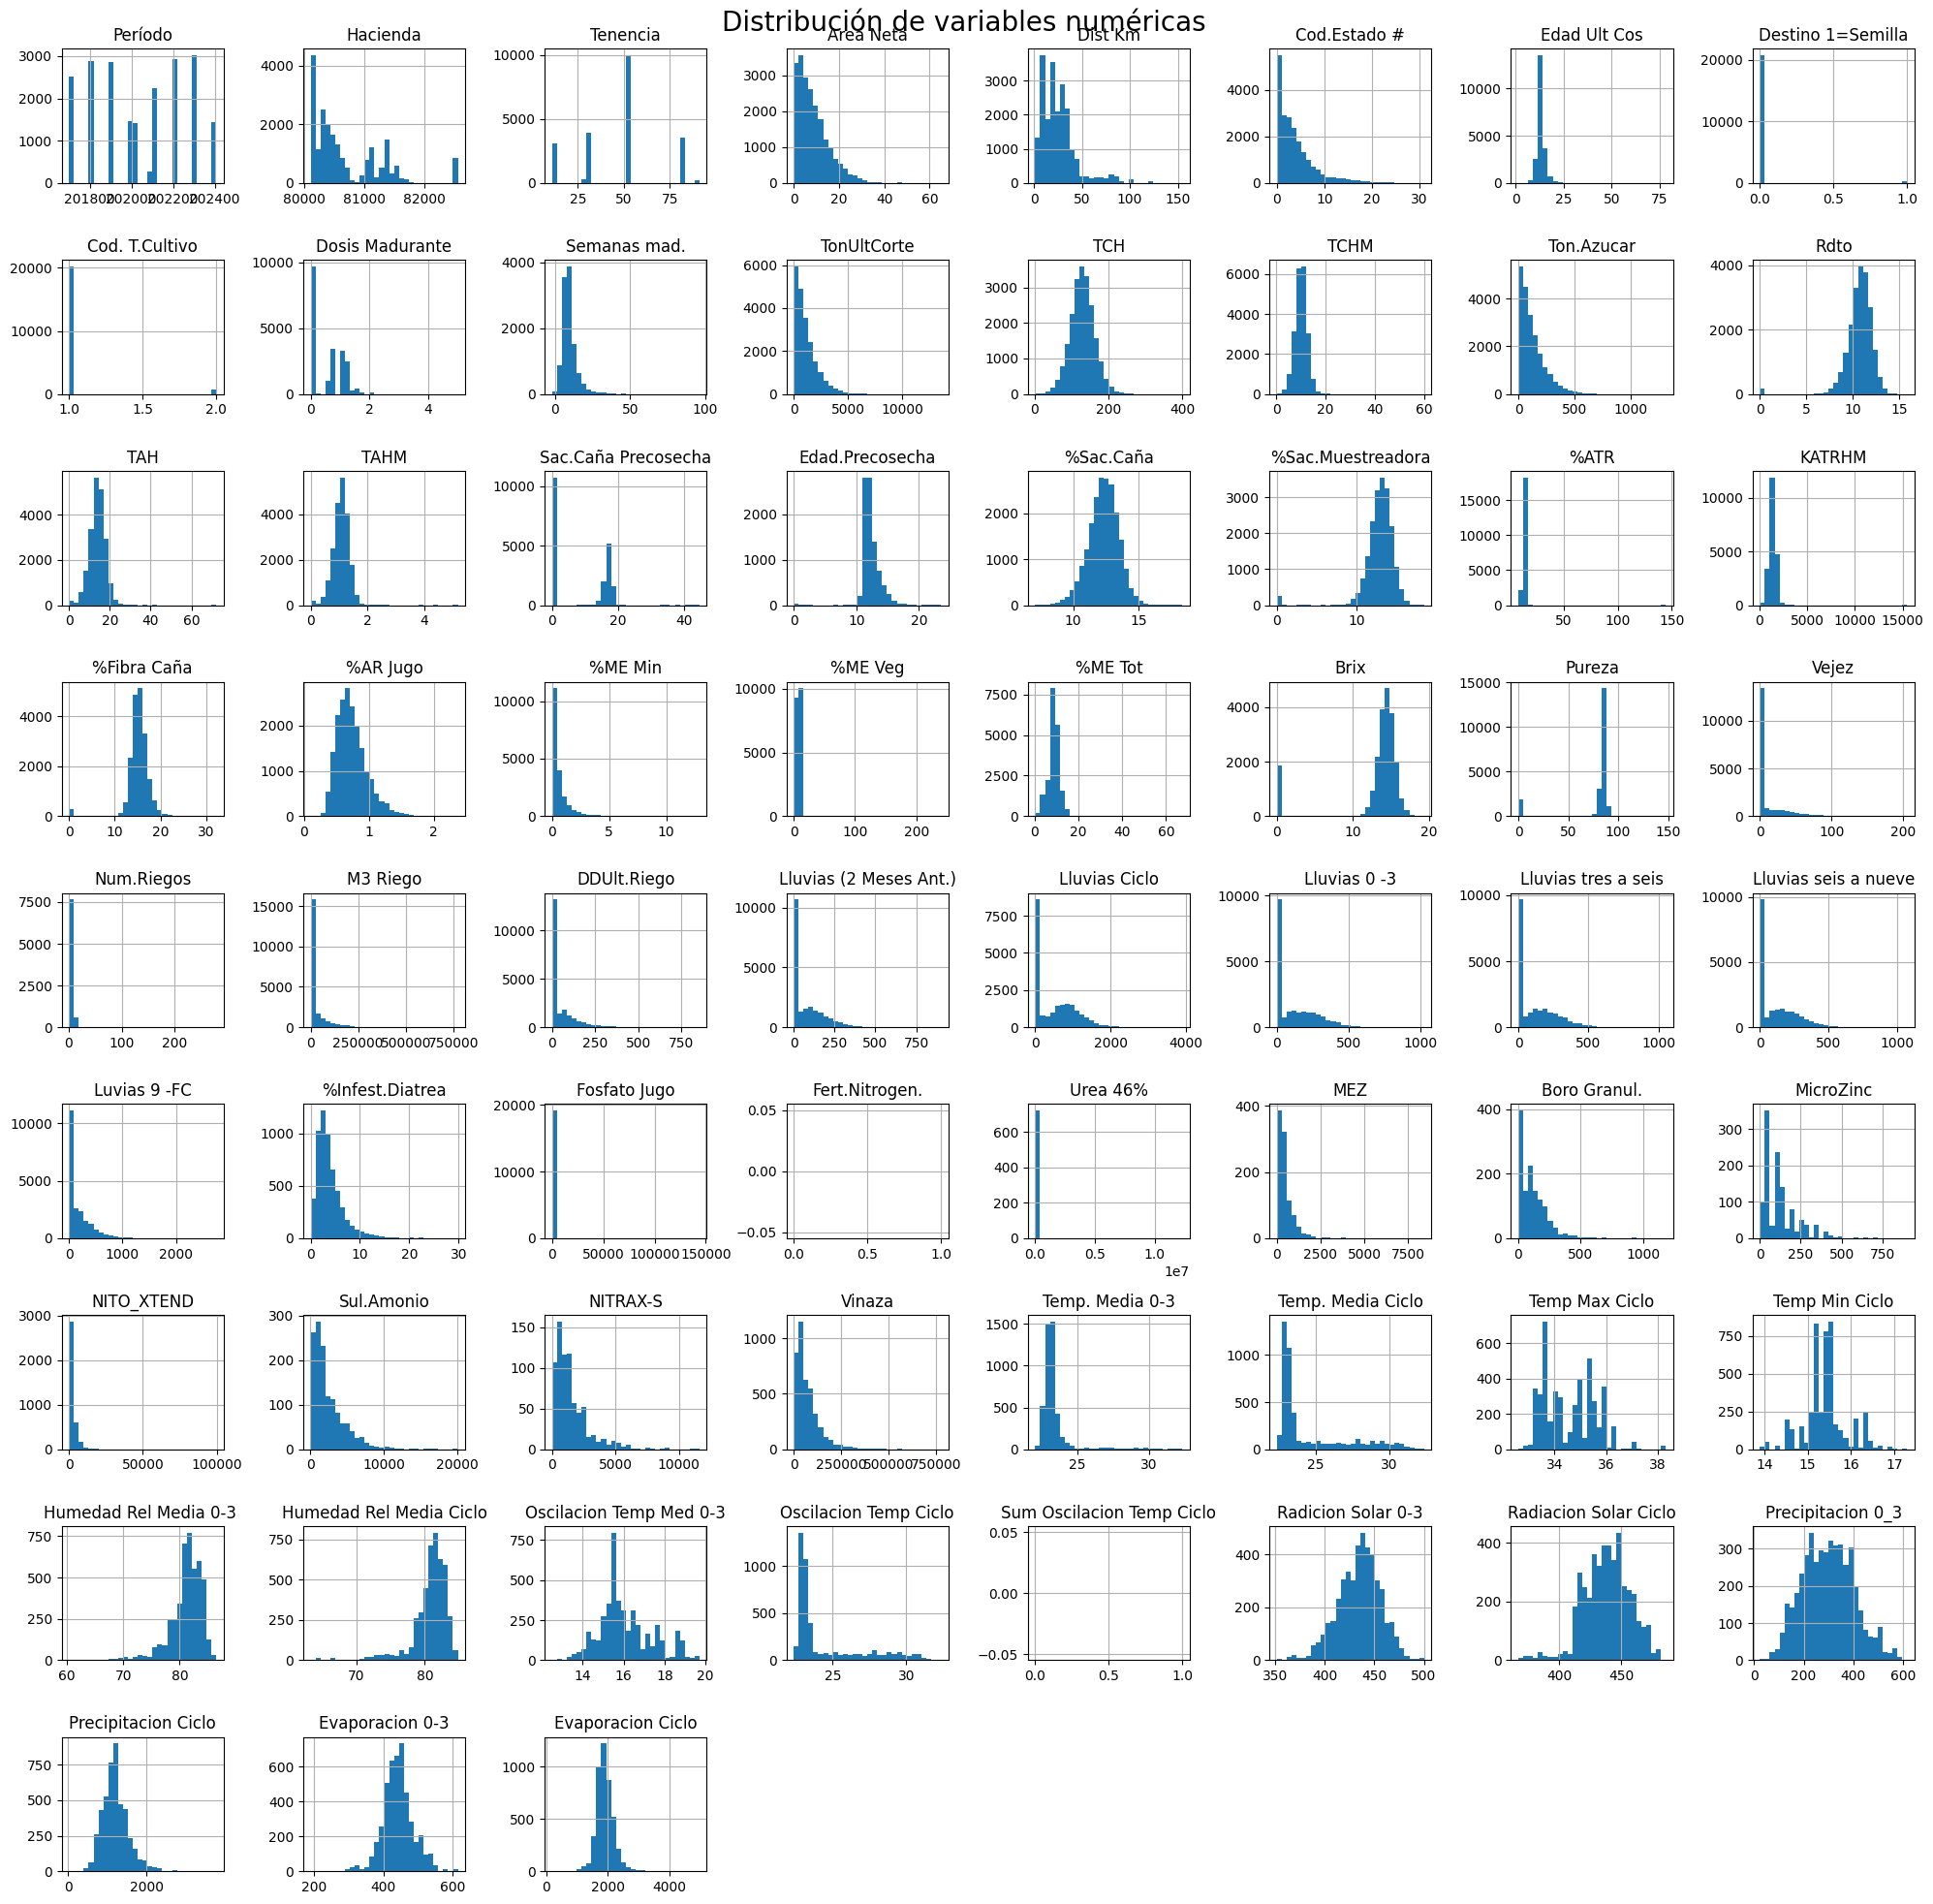

In [7]:
df[NUMERICAL_FEATURES].hist(
    bins=30,
    figsize=(20, 20),   
)
plt.suptitle("Distribución de variables numéricas", fontsize=20)
plt.tight_layout()
plt.show()

---
### **Limpieza: Identificadores** 

Limpieza de variables como `Periodo`, `Hacienda`, `Nombre`, `Suerte`, `Cod.Estado`, `F.Siembra` debido a posible data leakage o variables que no aportan prediccion porque pueden hacer las veces de identificadores más que de predictores. 

In [8]:
REDUNDANT_FEATURES = ['Período', 'Hacienda', 'Nombre', 'Suerte', 'Cod.Estado', 'F.Siembra', 'Cerca de', 'Tenencia', 'Zona', 'Cosechó']
df = df.drop(columns = REDUNDANT_FEATURES)

---
### **Matrices de Correlación**  
Matrices de correlación orientadas a TCH y %Sac.Caña, al igual que matriz de correlación general

In [9]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns

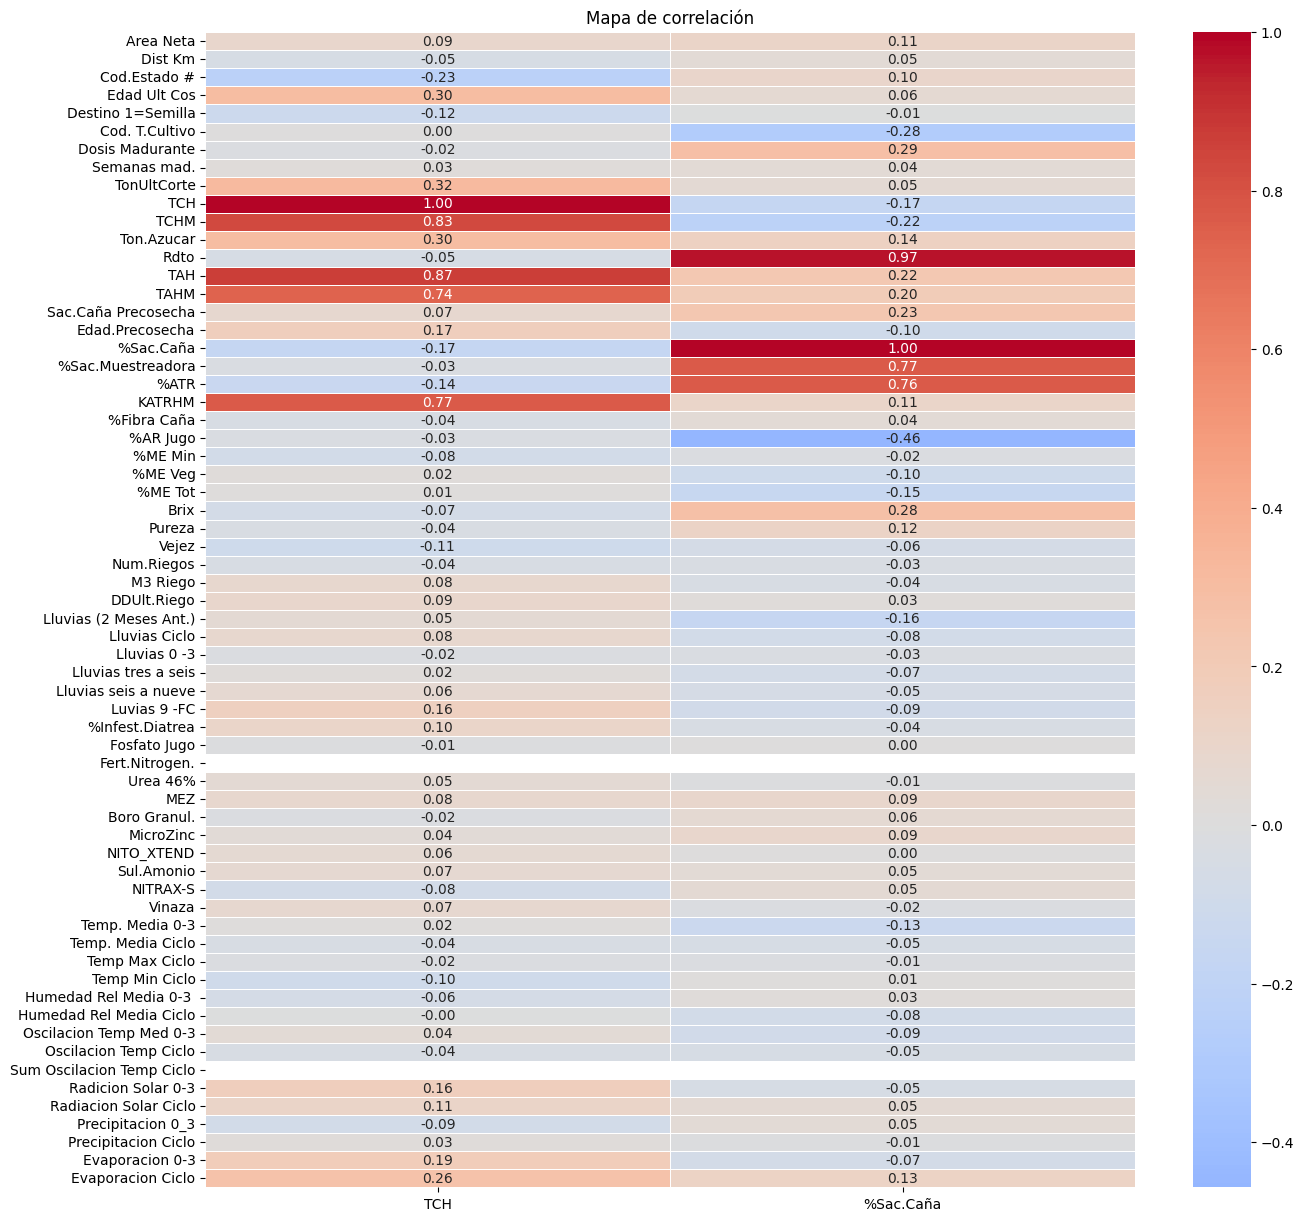

In [10]:
plt.figure(figsize=(15,15))
numerical_df = df[NUMERICAL_FEATURES]
numerical_corr = numerical_df.corr()
sns.heatmap(numerical_corr[["TCH", "%Sac.Caña"]], 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

Se observa multicolinealidad entre algunas variables al igual que altas correlaciones entre variable objetivo y posibles leaks. 

---
### **Limpieza: Leakage para TCH**
Se eliminan variables que se obtienen despues de la cosecha de la caña y que no influyen en la predicción de TCH. 

In [11]:
TCH_LEAKAGE = ['Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', 'KATRHM', 'Brix', 'Pureza', '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'TCHM']

df = df.drop(columns = TCH_LEAKAGE)

---
### **Limpieza: Variables de Riego**  
Se revisan features relacionadas con riego para eliminar multicolinealidad

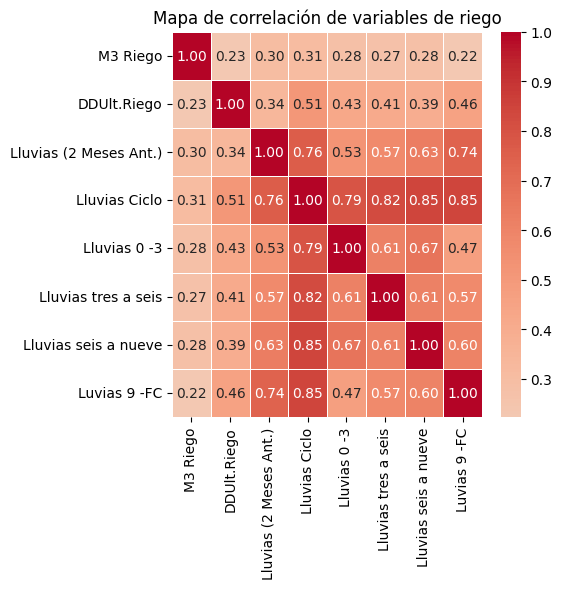

In [12]:
IRRIGATION_FEATURES = ['M3 Riego', 'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', 'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC']

plt.figure(figsize=(5,5))
numerical_irrig_df = df[IRRIGATION_FEATURES]
irrig_corr = numerical_irrig_df.corr()
sns.heatmap(irrig_corr, 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación de variables de riego")
plt.show()

In [13]:
##IRRIGATION_DEPURE = ['Lluvias (2 Meses Ant.)', 'Lluvias 0 -3', 'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC']
##IRRIGATION_FEATURES = [f for f in IRRIGATION_FEATURES if f not in IRRIGATION_DEPURE]
##df = df.drop(columns = IRRIGATION_DEPURE)
df[IRRIGATION_FEATURES]

M3 Riego  DDUlt.Riego  Lluvias (2 Meses Ant.)  Lluvias Ciclo  \
0           0.00            0                   258.0         1038.0   
1           0.00            0                     0.0            0.0   
2       48513.60          107                   246.0         1002.0   
3           0.00            0                     0.0            0.0   
4           0.00            0                   138.0          991.0   
...          ...          ...                     ...            ...   
21022   16605.96           27                   200.0         1123.0   
21023    6435.60           25                   200.0         1139.0   
21024    9564.96           25                   200.0         1139.0   
21025  289740.00           40                   212.0          905.0   
21026    7440.90           76                   212.0          921.0   

       Lluvias 0 -3  Lluvias tres a seis  Lluvias seis a nueve  Luvias 9 -FC  
0               0.0                454.0                 102.0         482.0  
1               0.0                  0.0                   0.0           0.0  
2             106.0                326.0                 113.0         457.0  
3               0.0                  0.0                   0.0           0.0  
4             264.0                255.0                 188.0         284.0  
...             ...                  ...                   ...           ...  
21022         137.0                225.0                 201.0         560.0  
21023         138.0                231.0                 210.0         560.0  
21024         138.0                231.0                 210.0         560.0  
21025         136.0                211.0                 164.0         394.0  
21026          82.0                275.0                 170.0         394.0  

[21027 rows x 8 columns]

---
### **Limpieza: Variables del clima**  
Se revisan variables relacionadas del clima por si existe alguna multicolinealidad entre las mismas

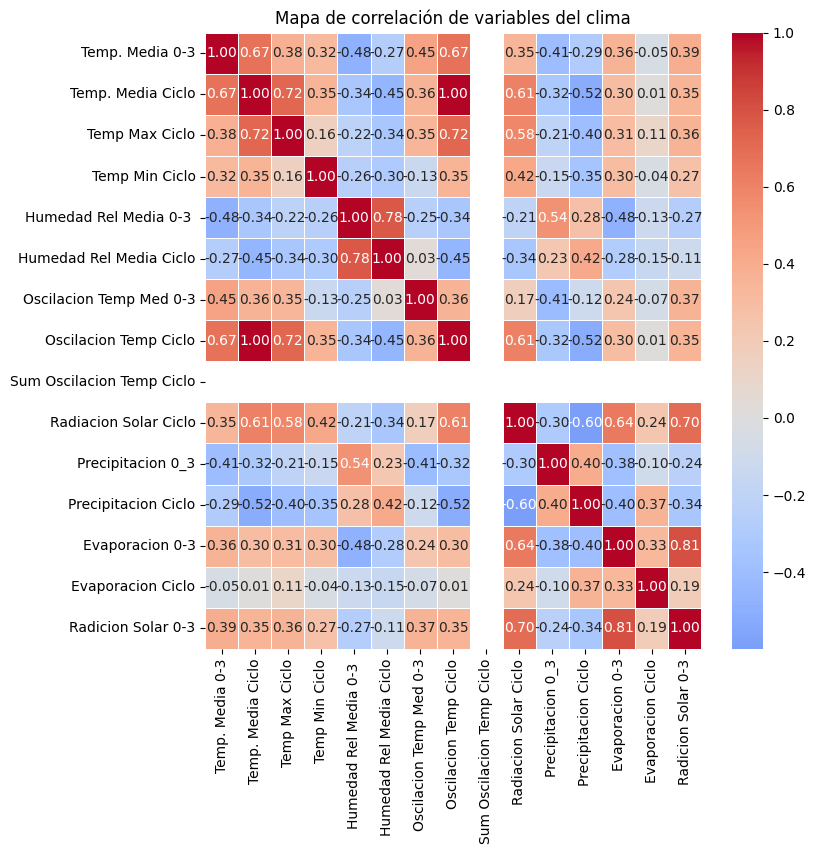

In [14]:
WEATHERING_FEATURES = ['Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo', 'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ciclo', 'Sum Oscilacion Temp Ciclo', 'Radiacion Solar Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo', 'Evaporacion 0-3', 'Evaporacion Ciclo', 'Radicion Solar 0-3']

plt.figure(figsize=(8,8))
numerical_weathering_df = df[WEATHERING_FEATURES]
weathering_corr = numerical_weathering_df.corr()
sns.heatmap(weathering_corr, 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación de variables del clima")
plt.show()



In [15]:
#WEATHERING_DEPURE = ['Temp. Media 0-3', 'Humedad Rel Media 0-3 ', 'Oscilacion Temp Med 0-3', 'Sum Oscilacion Temp Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo', 'Evaporacion 0-3', 'Radicion Solar 0-3']
#WEATHERING_FEATURES = [f for f in WEATHERING_FEATURES if f not in WEATHERING_DEPURE]
#df = df.drop(columns = WEATHERING_DEPURE)
#df[WEATHERING_FEATURES]

---
### **Distribucion Final**

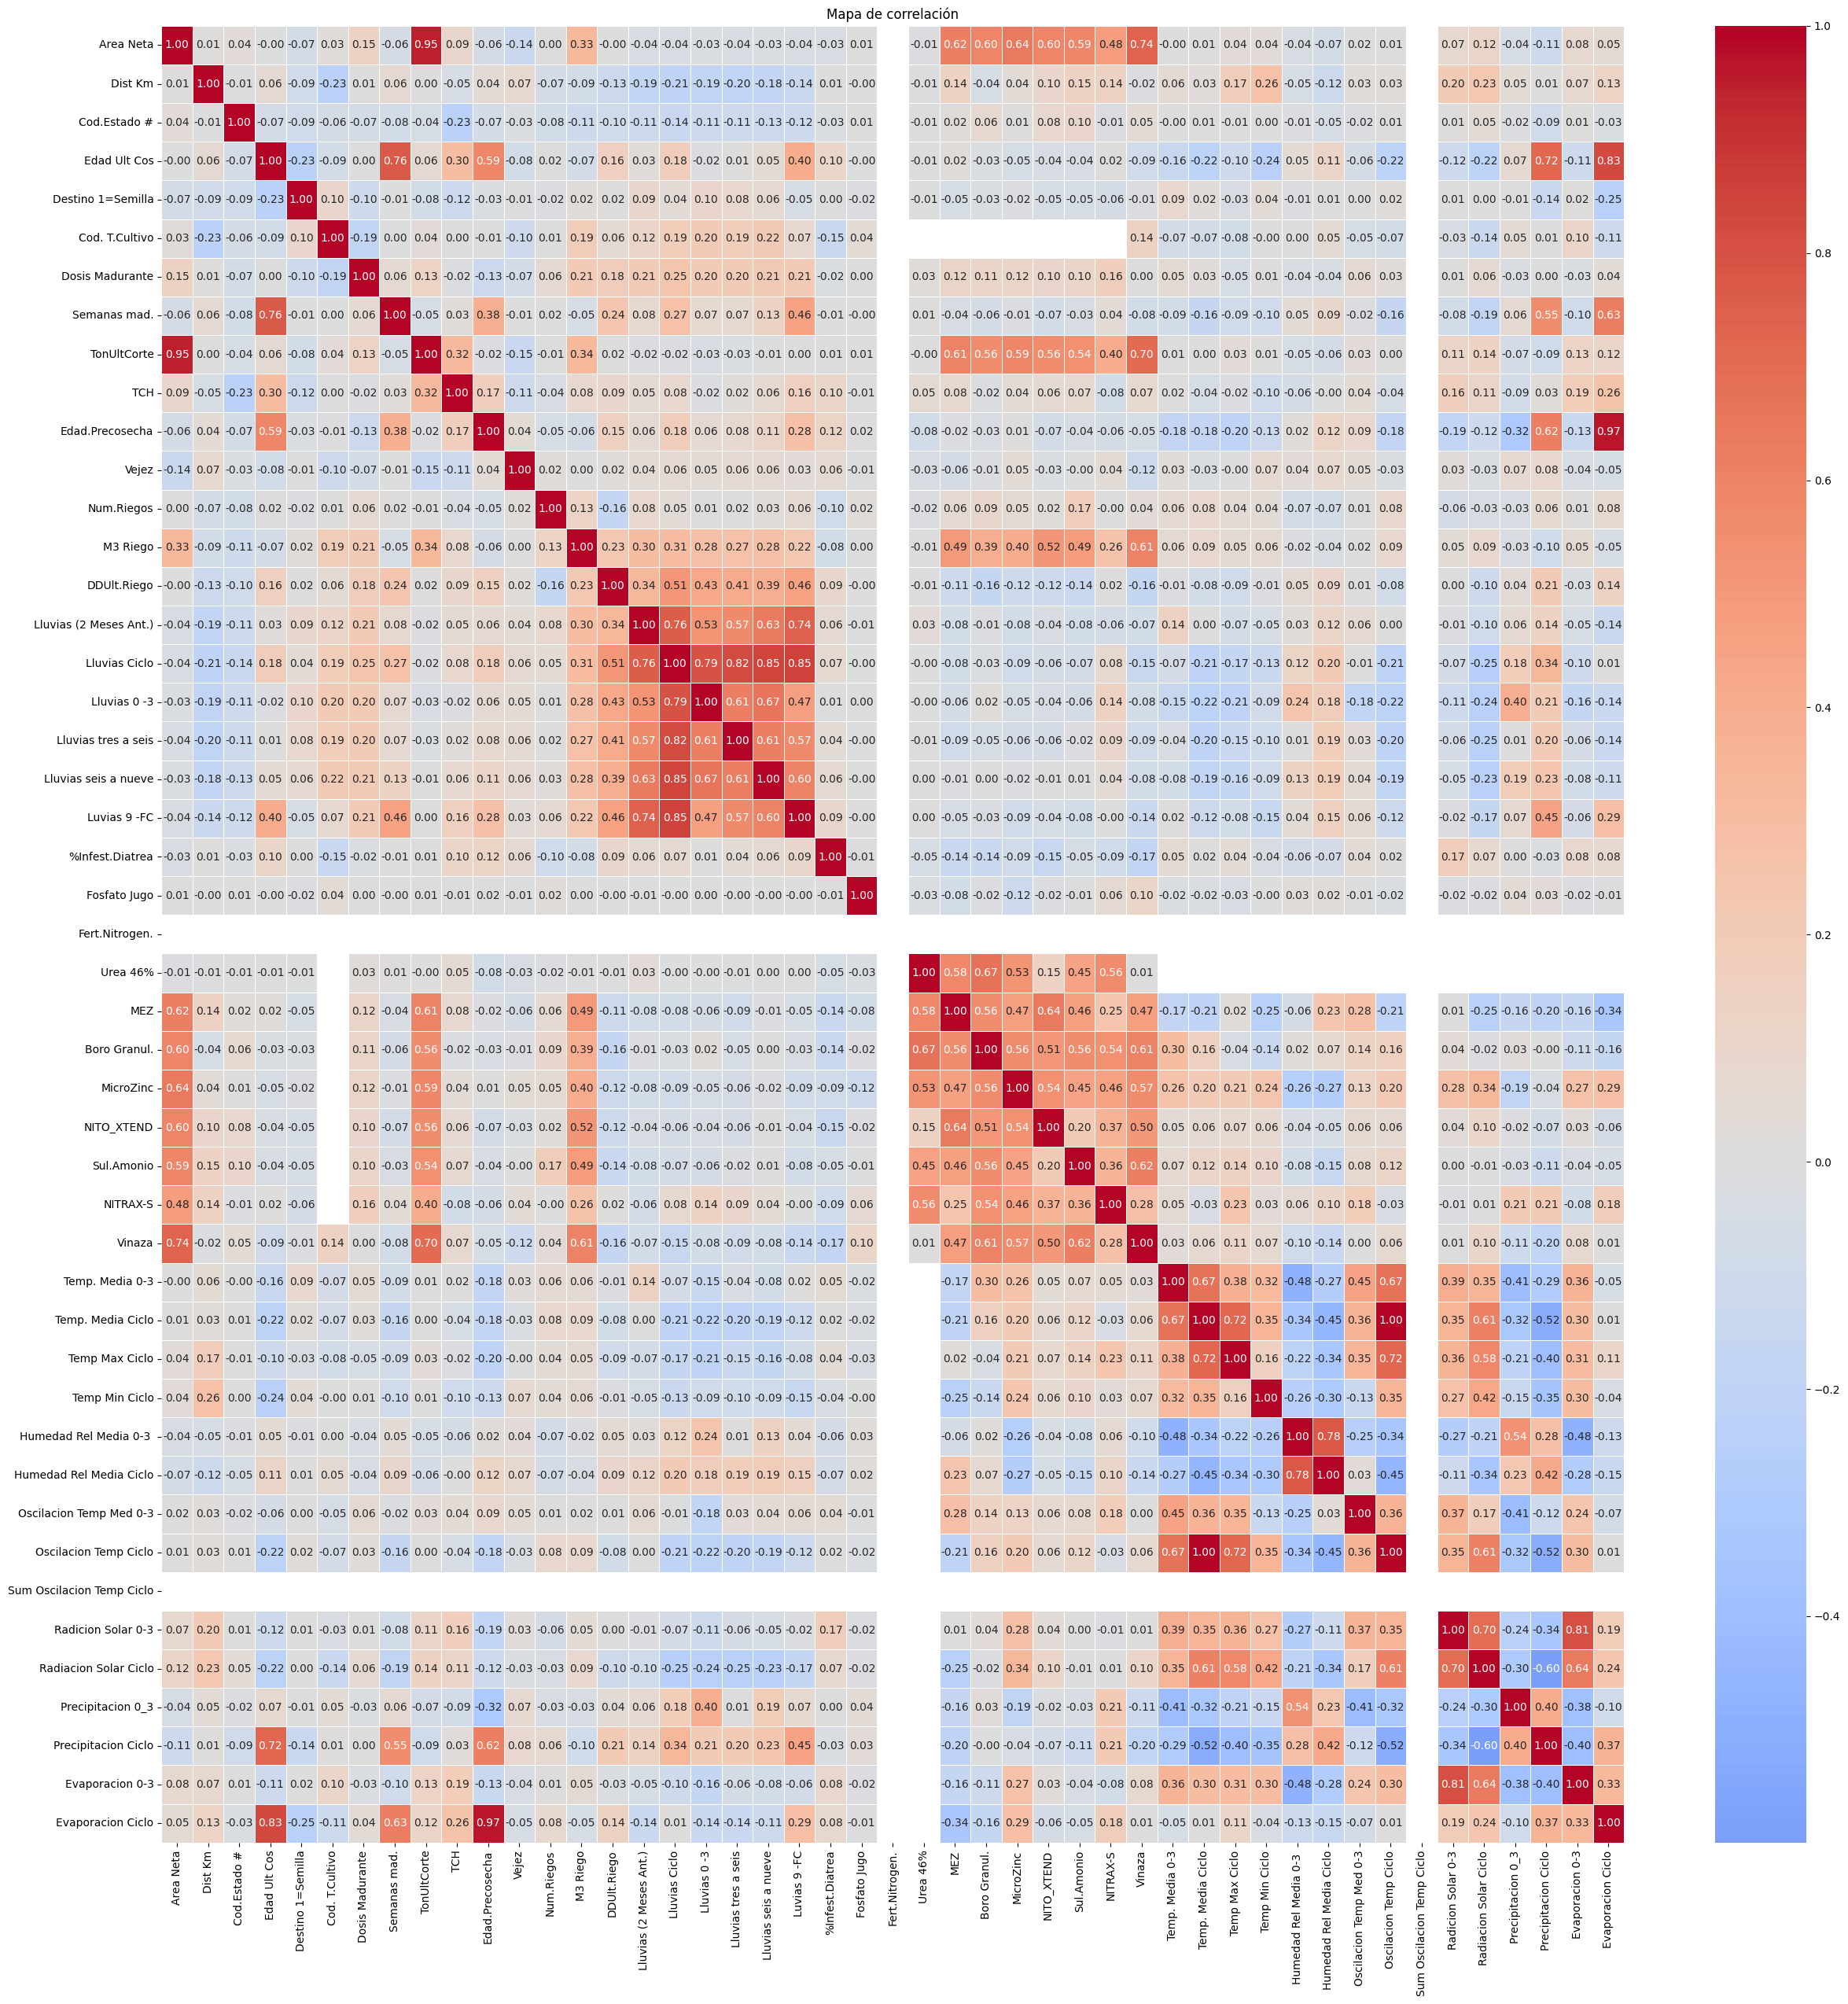

In [16]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns
numerical_df = df[NUMERICAL_FEATURES]
numerical_corr = numerical_df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(numerical_corr, 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

---
### **Distribución de TCH**

In [17]:
df['TCH'].describe()

count    21027.000000
mean       129.608509
std         32.846029
min          1.573653
25%        108.691426
50%        129.479600
75%        150.407607
max        401.045947
Name: TCH, dtype: float64

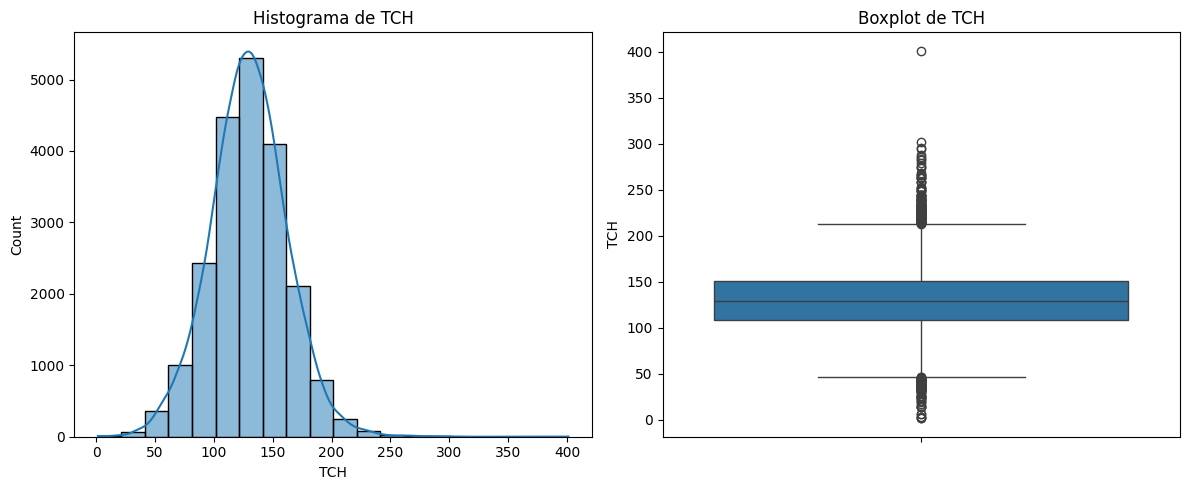

In [18]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['TCH'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Histograma de TCH")

sns.boxplot(y=df['TCH'], ax=axes[1])
axes[1].set_title("Boxplot de TCH")

plt.tight_layout()
plt.show()

### **Gráficos de Dispersión respecto a TCH**

c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


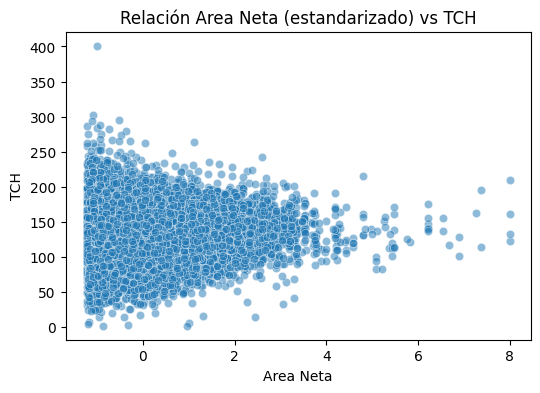

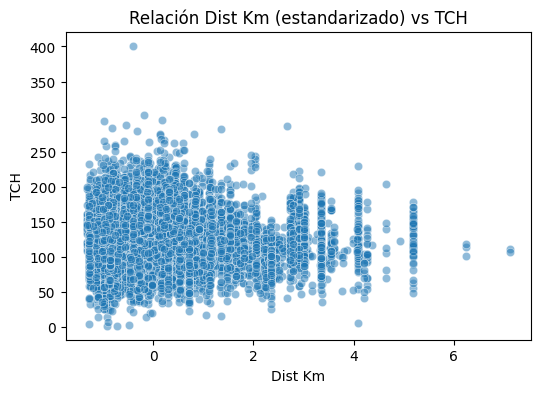

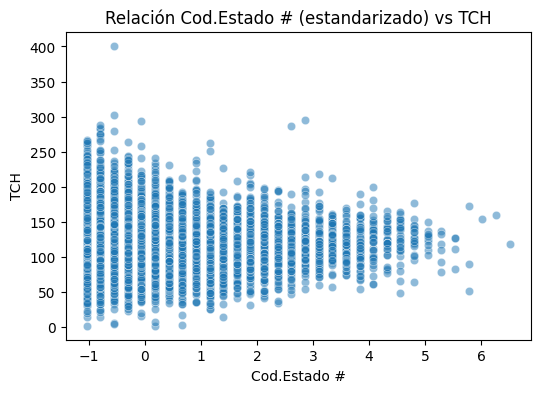

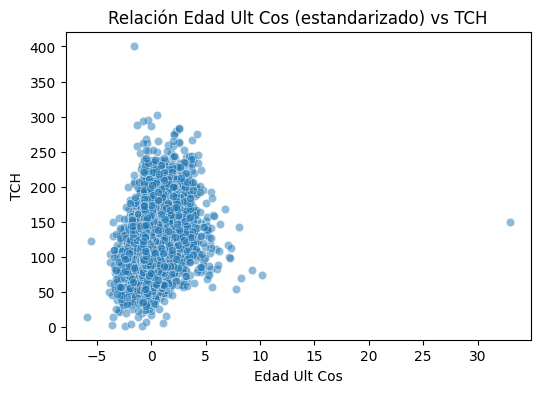

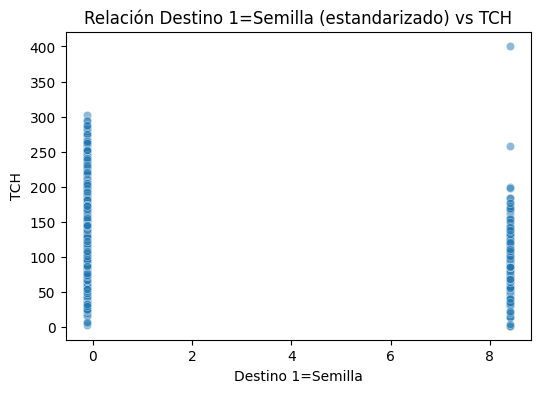

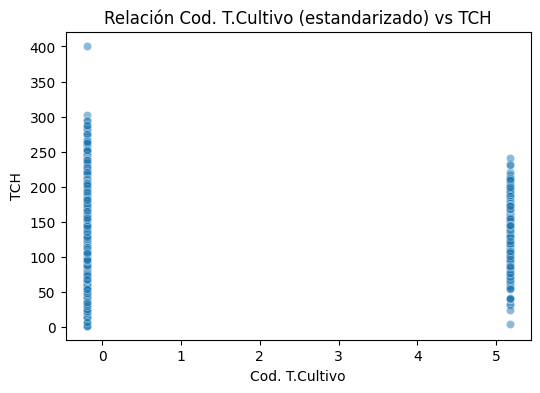

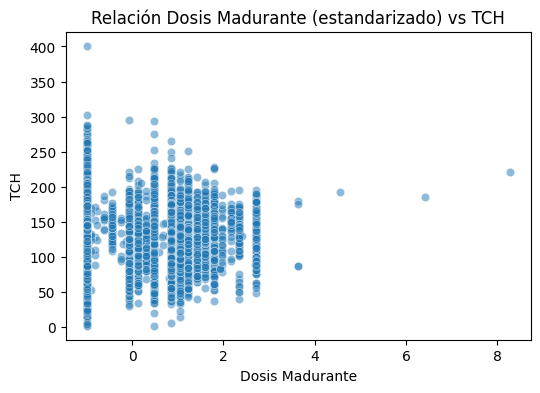

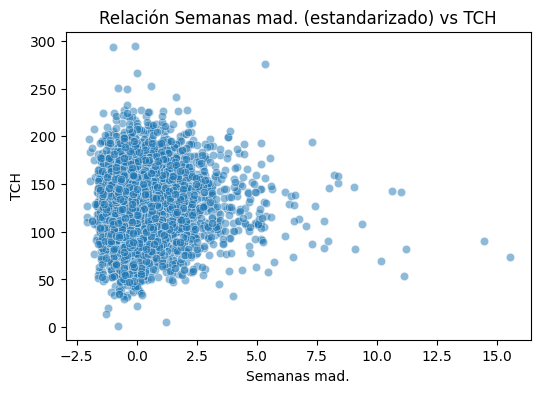

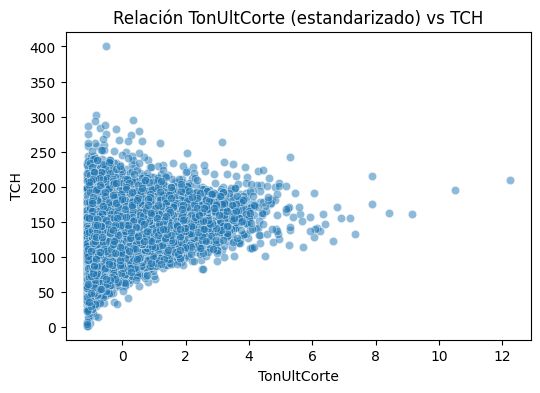

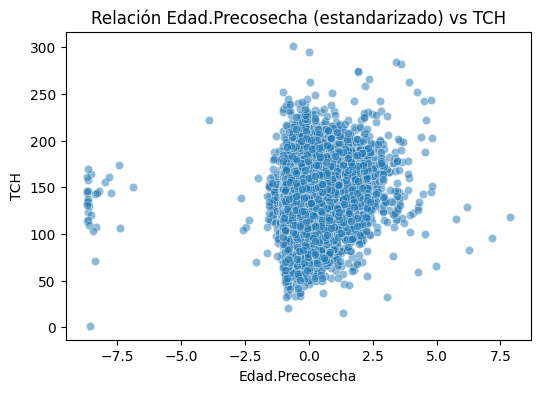

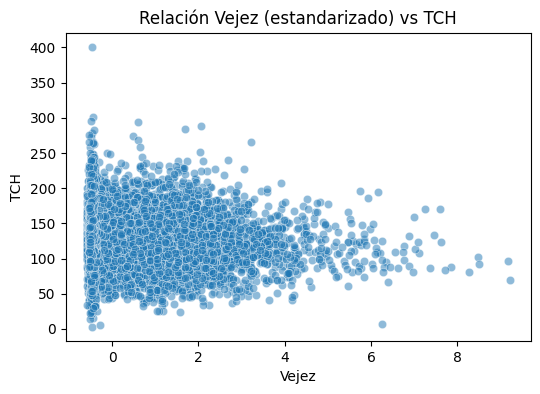

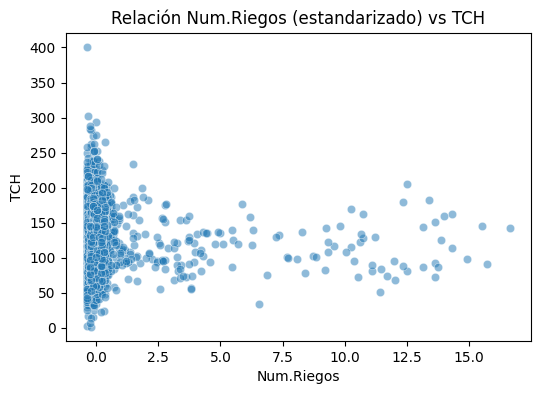

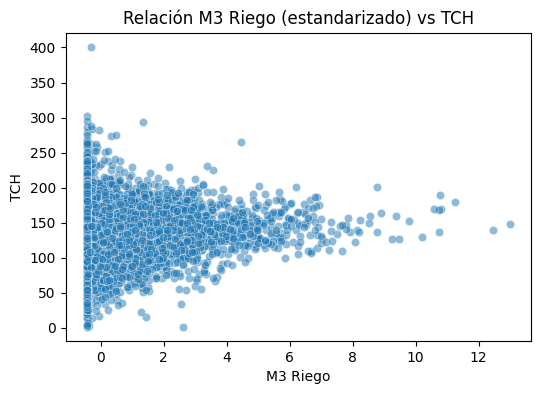

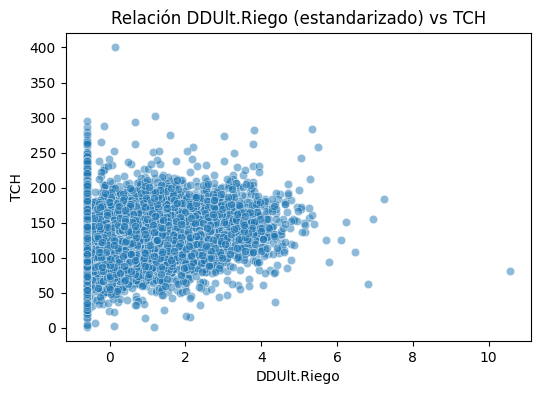

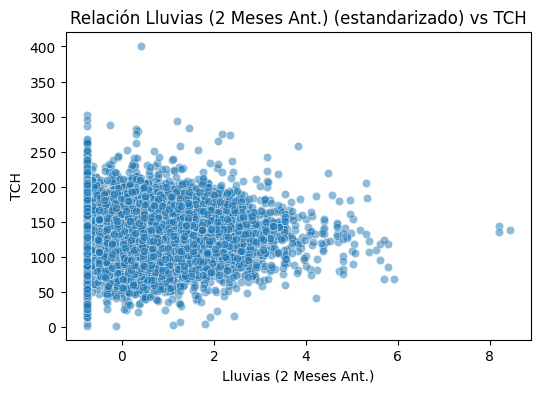

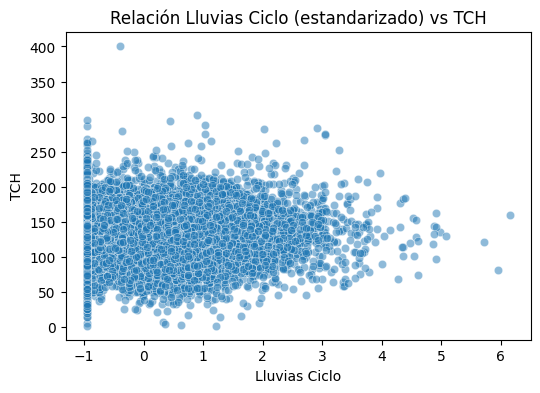

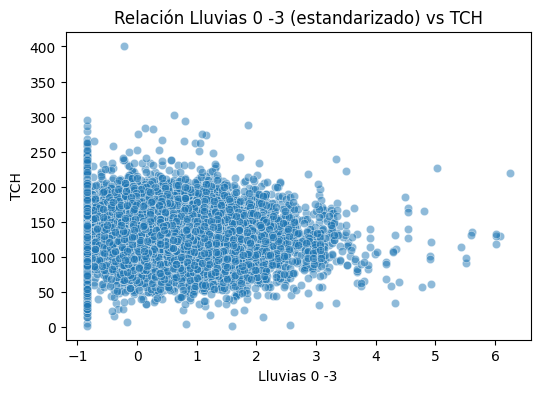

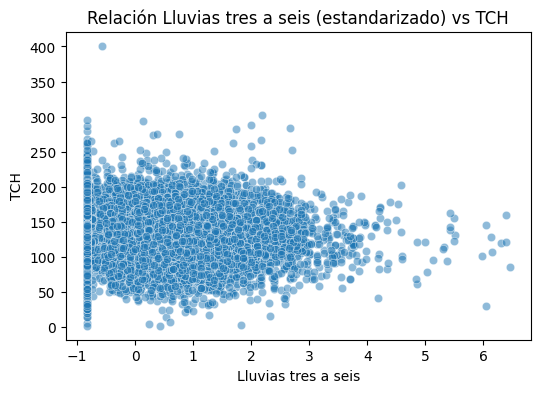

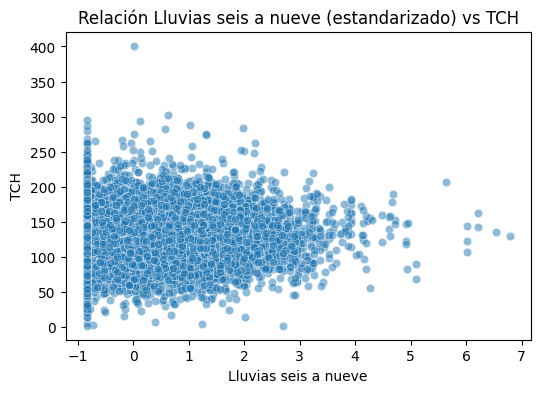

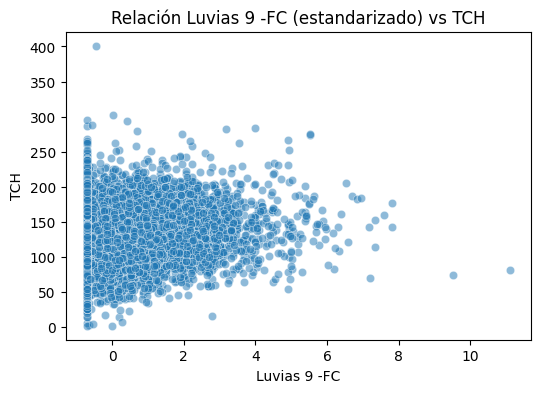

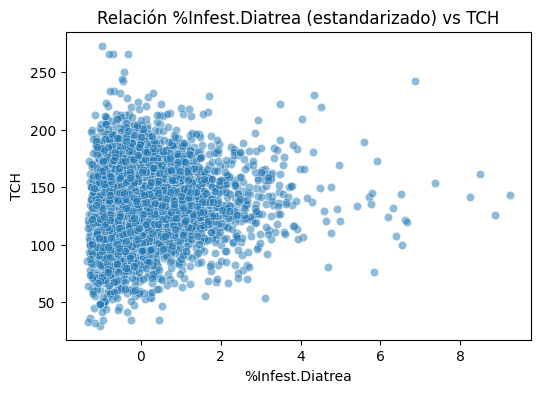

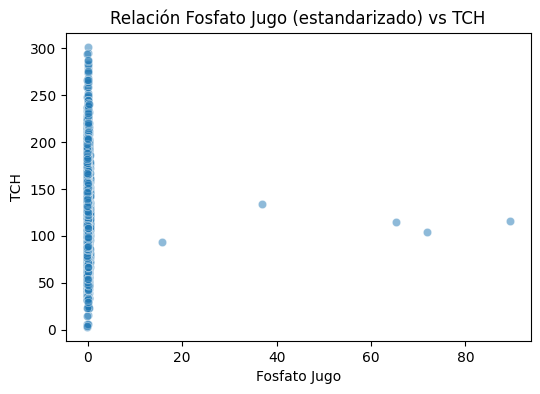

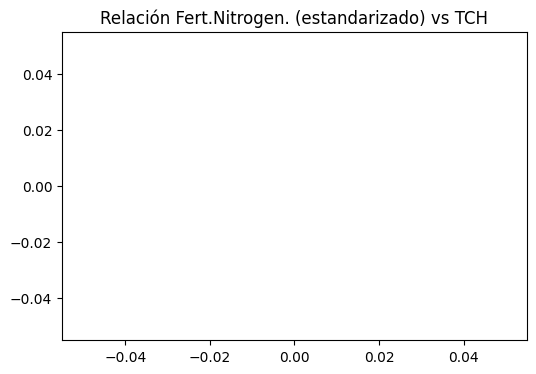

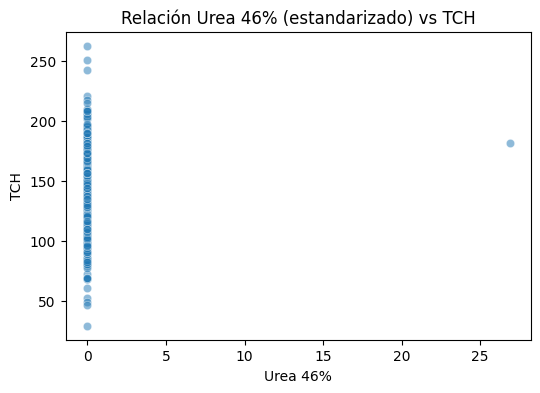

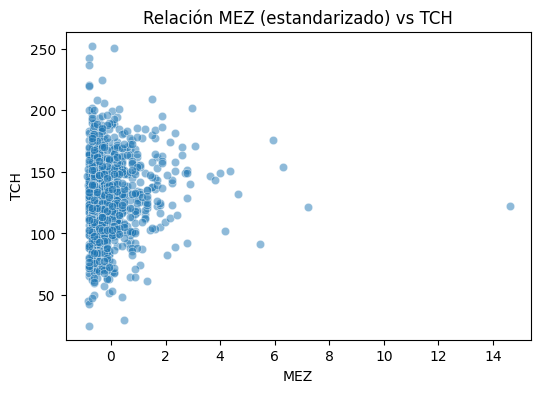

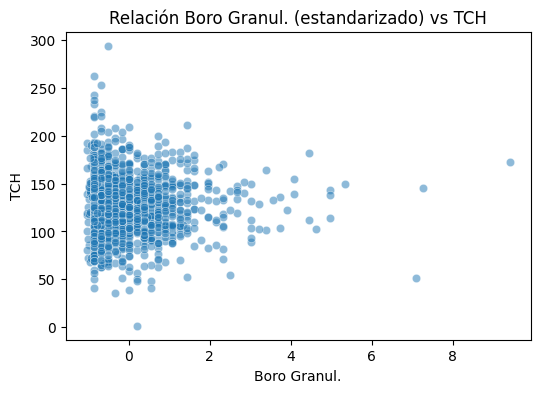

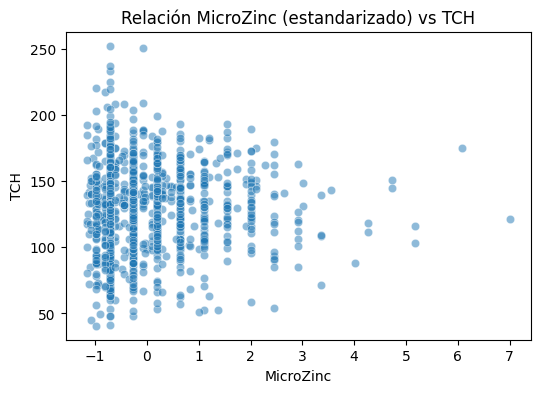

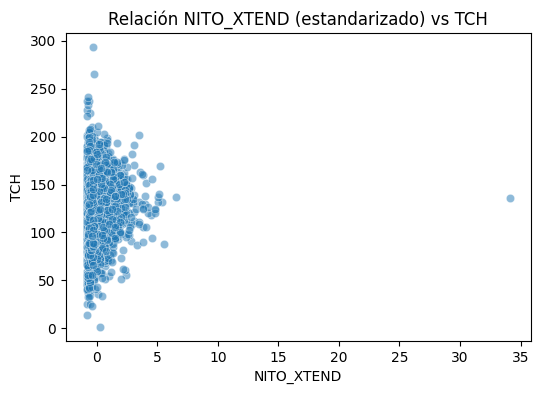

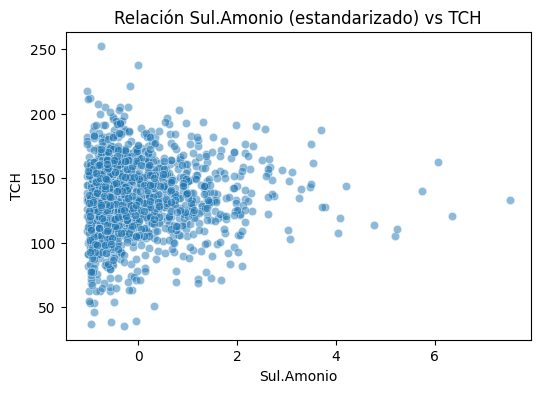

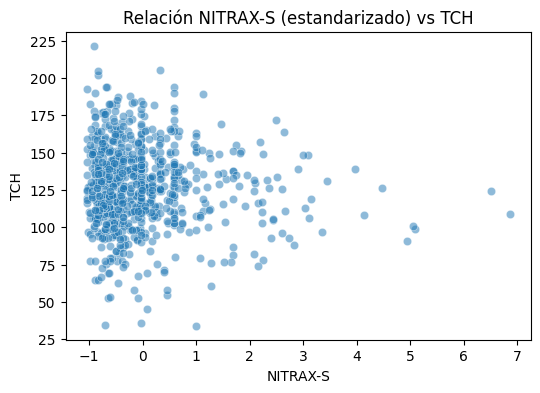

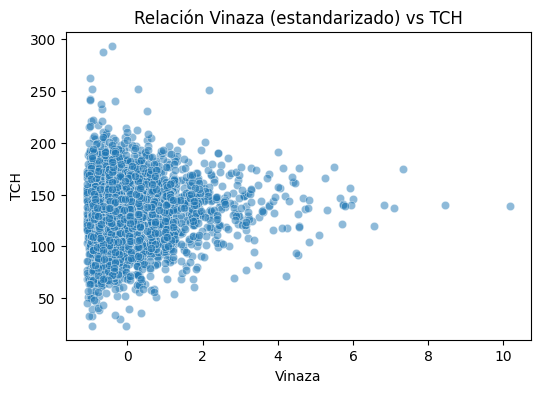

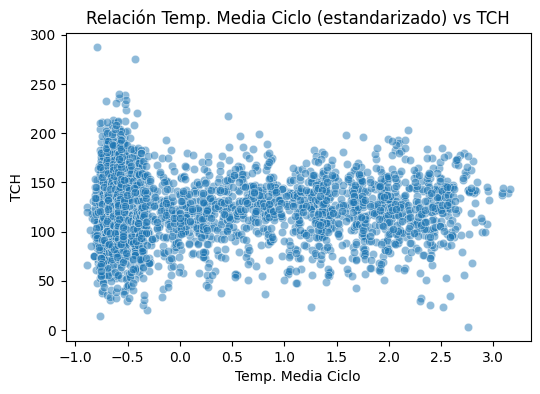

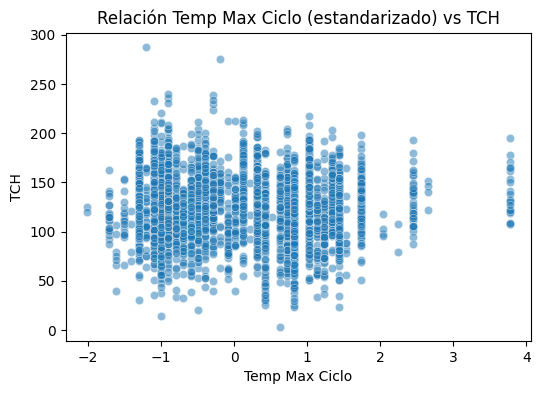

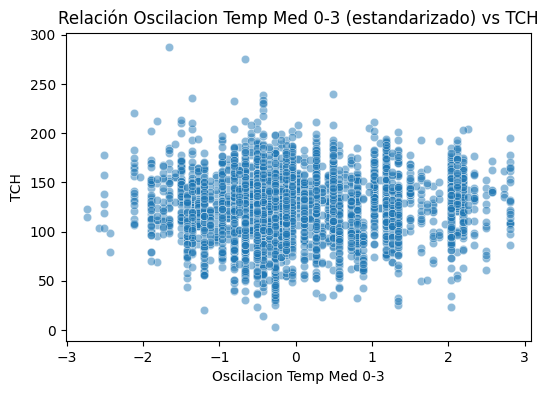

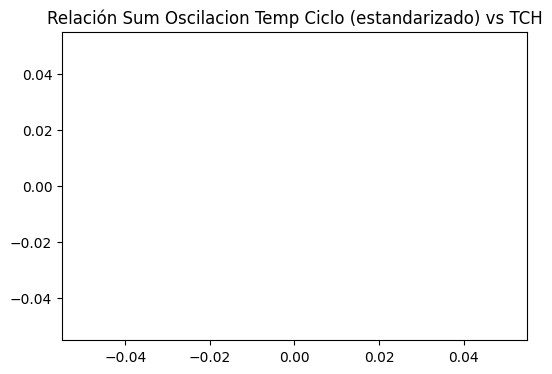

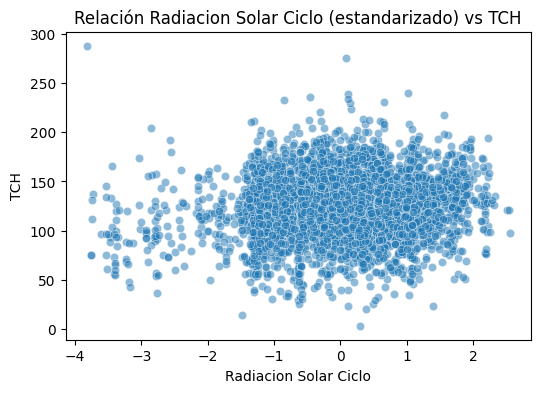

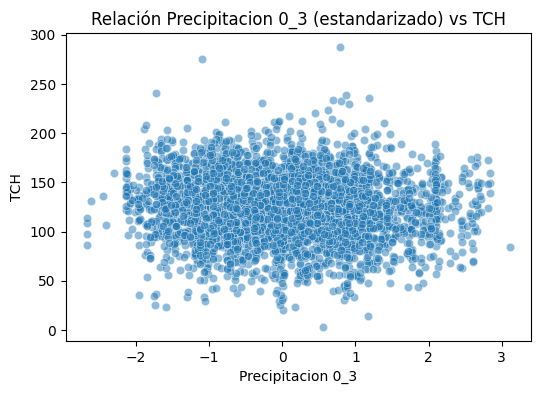

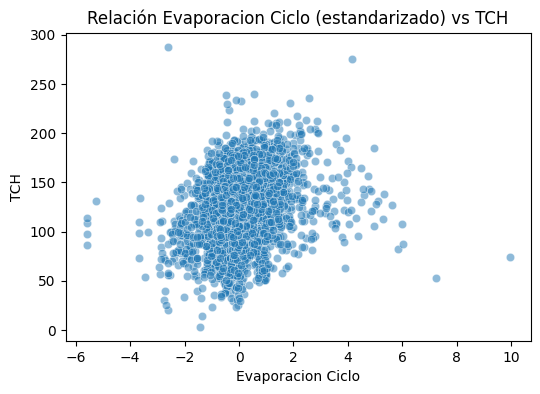

In [19]:
from sklearn.preprocessing import StandardScaler
df_filtered = df.copy()
numericas = df_filtered.select_dtypes(include='number').columns

numericas_sin_tch = [col for col in numericas if col != 'TCH']

scaler = StandardScaler()
df_scaled = df_filtered.copy()
df_scaled[numericas_sin_tch] = scaler.fit_transform(df_filtered[numericas_sin_tch])

for col in numericas_sin_tch:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_scaled[col], y=df_scaled['TCH'], alpha=0.5)
    plt.title(f"Relación {col} (estandarizado) vs TCH")
    plt.show()

In [20]:
CHEM_FEATURES = ['Urea 46%', 'NITRAX-S', 'MEZ', 'NITO_XTEND', 'Vinaza', 'MicroZinc', 'Boro Granul.', 'Sul.Amonio']
df[CHEM_FEATURES] = df[CHEM_FEATURES].fillna(0)

In [21]:
df['TCH'].isnull().sum()

np.int64(0)

In [22]:
df_mod = df.copy()

np.int64(0)

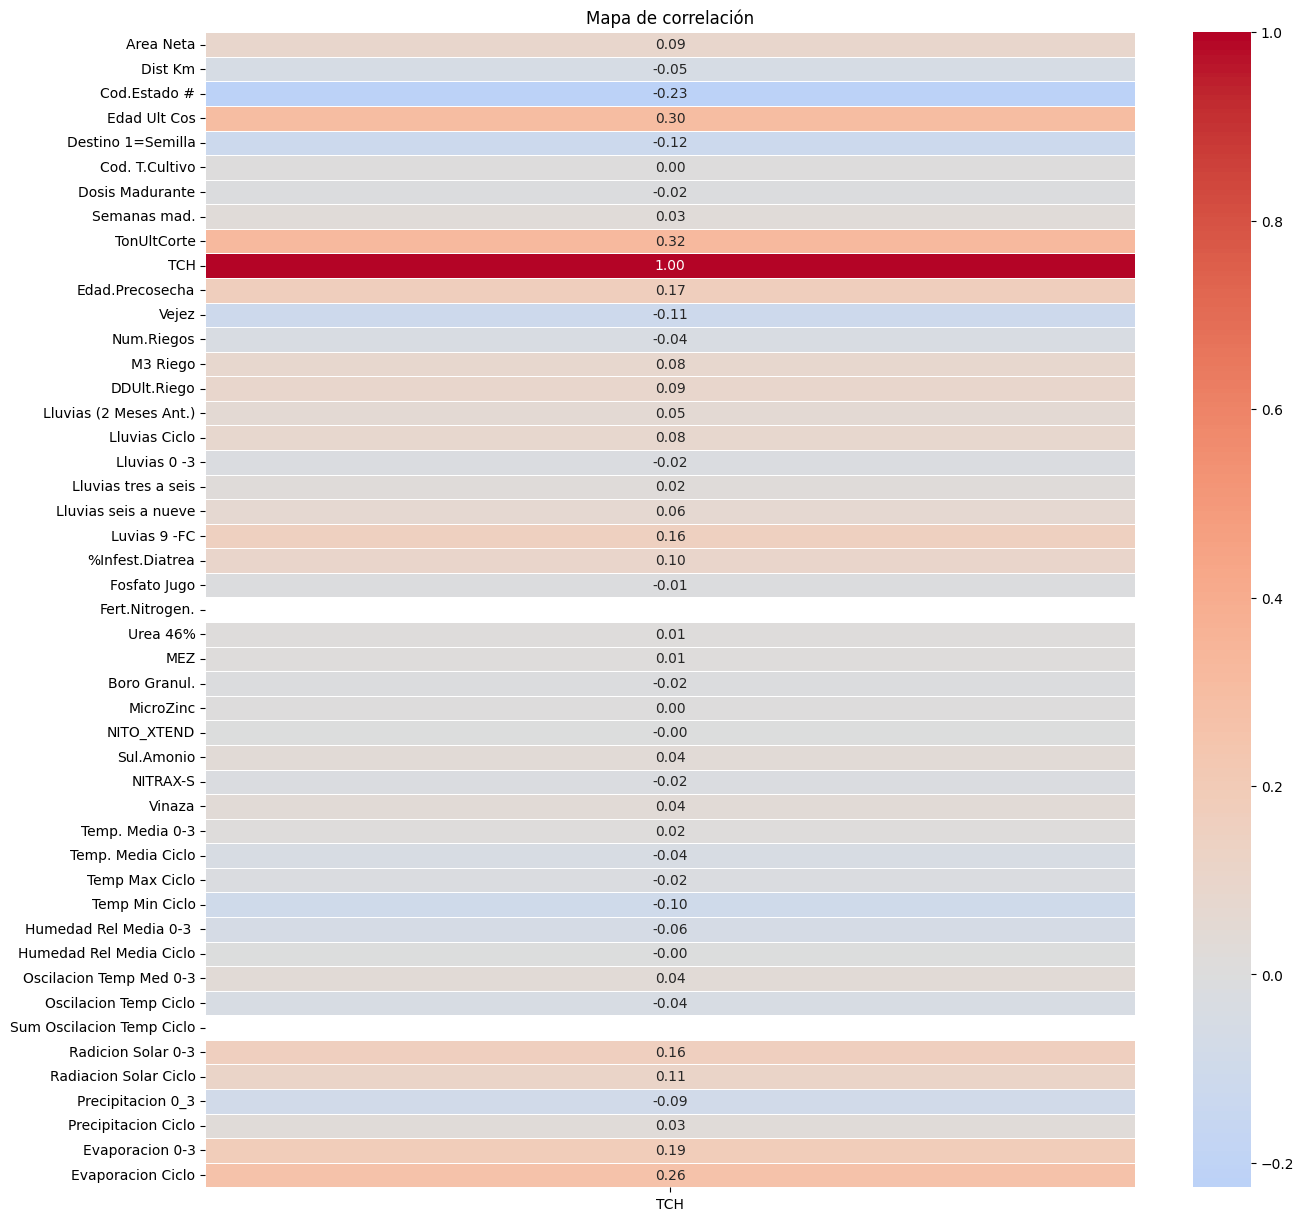

In [48]:
NUMERICAL_FEATURES = df_mod.select_dtypes(include=["int64", "float64"]).columns
matrix_corr = df_mod[NUMERICAL_FEATURES].corr()
plt.figure(figsize=(15,15))
sns.heatmap(matrix_corr[['TCH']], 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)
plt.title("Mapa de correlación")
plt.show()

In [26]:
null_percent = df_mod[['Area Neta', 'Cod.Estado #', 'Dist Km', 'Edad Ult Cos', 'Destino 1=Semilla', 'Vejez', 'DDUlt.Riego', 'M3 Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', '%Infest.Diatrea', 'Fosfato Jugo', 'Temp Max Ciclo', 'Temp. Media 0-3']].isnull().mean() * 100
null_percent.sort_values(ascending=False).head(10)

Temp Max Ciclo       78.456271
Temp. Media 0-3      78.456271
%Infest.Diatrea      73.367575
Vejez                11.627907
Fosfato Jugo          8.836258
Dist Km               0.023779
Area Neta             0.000000
DDUlt.Riego           0.000000
Destino 1=Semilla     0.000000
Edad Ult Cos          0.000000
dtype: float64

In [50]:
NUMERIC_DF = df_mod.select_dtypes(include=["int64", "float64"])
corr_matrix = NUMERIC_DF.corr()
corr_matrix['%Sac.Caña'].sort_values(ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix[['%Sac.Caña']],
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)
plt.title("Mapa de correlación")
plt.show()


KeyError: '%Sac.Caña'

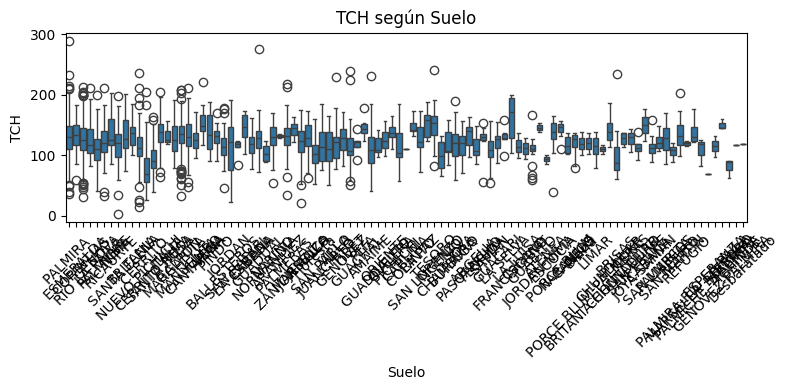

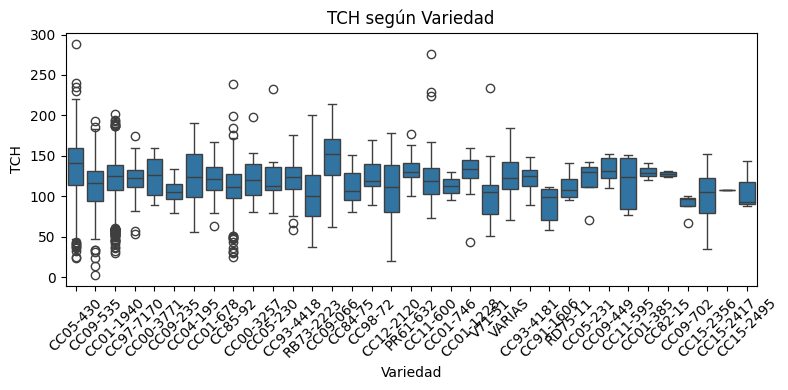

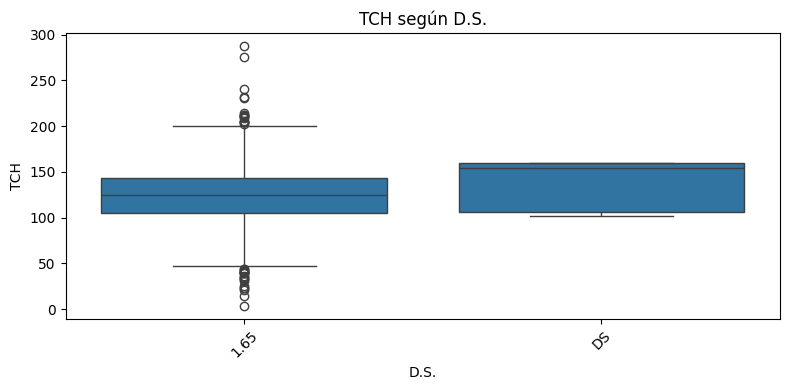

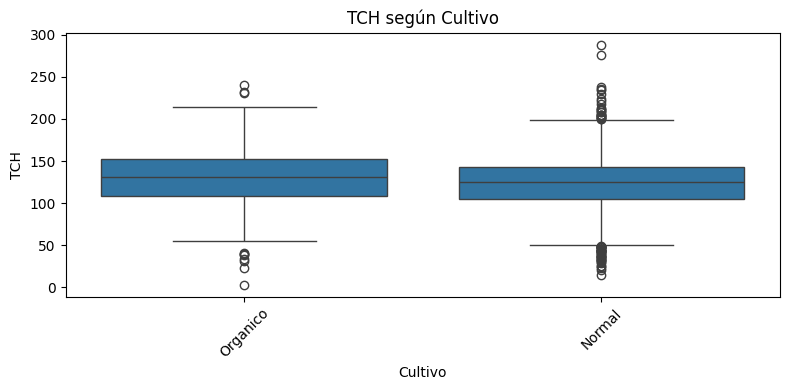

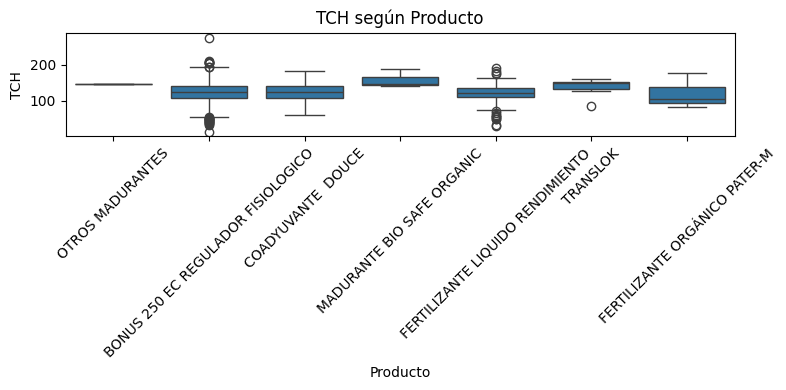

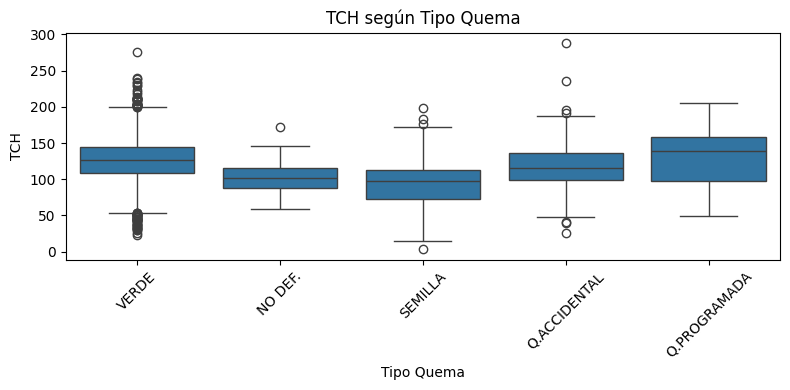

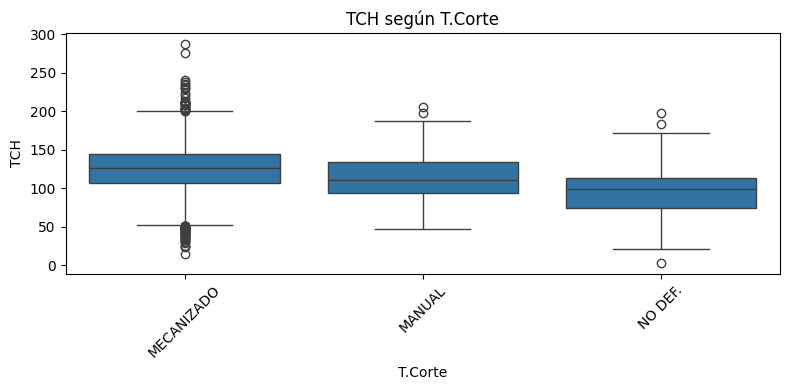

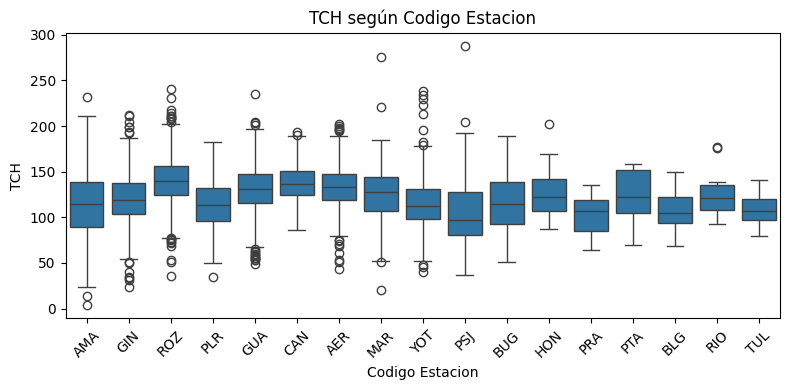

                   F_value       p_value
Variedad         55.537960  1.091998e-13
Codigo Estacion  48.582408  3.623552e-12
Tipo Quema       43.276881  5.290711e-11
Suelo            43.030918  5.992311e-11
Cultivo          24.252901  8.748801e-07
T.Corte          12.571214  3.956957e-04
Producto          4.607517  3.188507e-02
D.S.              0.600717  4.383452e-01


In [99]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.preprocessing import LabelEncoder

# Identificar variables categóricas en df_mod
cat_features = df_mod.select_dtypes(include=['object', 'category']).columns.tolist()

# Graficar boxplots para cada variable categórica vs TCH
for col in cat_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_mod[col], y=df_mod['TCH'])
    plt.title(f"TCH según {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Calcular correlación de variables categóricas con TCH usando ANOVA F-value

anova_results = {}
for col in cat_features:
    le = LabelEncoder()
    x = le.fit_transform(df_mod[col].astype(str))
    f_val, p_val = f_regression(x.reshape(-1, 1), df_mod['TCH'])
    anova_results[col] = (f_val[0], p_val[0])

anova_df = pd.DataFrame(anova_results, index=['F_value', 'p_value']).T
print(anova_df.sort_values('F_value', ascending=False))

In [ ]:
#df_mod = df_mod.dropna(subset=['Evaporacion Ciclo'])

In [51]:
df_mod['Variedad'].value_counts()

Variedad
CC01-1940    9172
CC85-92      3997
CC05-430     2415
CC93-4418    1263
RB73-2223     872
VARIAS        324
CC97-7170     303
CC11-600      248
CC01-1228     235
V71-51        222
CC93-4181     215
CC00-3257     215
CC09-535      200
CC84-75       193
CC98-72       178
CC09-066      157
CC04-195      125
PR61-632      117
CC01-678       91
CC91-1606      50
CC12-2120      47
CC11-595       38
CC00-3771      38
SP71-6949      35
CC09-235       33
CC09-702       23
RD75-11        22
CC92-2804      21
CC01-746       20
CC04-667       18
CC82-15        16
CC15-2356      13
CC01-385       12
CC09-449       10
Q208           10
CC05-230        9
CC03-469        9
PR1141          8
Q191            6
CC92-2198       5
CC11-2132       5
RB85-5113       5
CC93-3895       4
PR1248          4
CC05-231        4
CO421           3
CC11-605        3
CC15-2495       3
CC00-3885       2
CC00-3079       1
CC03-1029       1
CC06-783        1
CC06-791        1
CC99-2461       1
CC01-1236       1
C

In [100]:
def reagrupar_por_frecuencia(df, umbral=50, categoria='Variedad'):
    df_copy = df.copy()
    
    counts = df_copy[categoria].value_counts()
    variedades_frecuentes = counts[counts >= umbral].index.tolist()
    nuevaCol = categoria + '_Reagrupada'
    df_copy[nuevaCol] = df_copy[categoria].apply(
        lambda x: x if x in variedades_frecuentes else 'OTRAS'
    )
    
    return df_copy

df_mod = reagrupar_por_frecuencia(df_mod, umbral=400, categoria="Variedad")
print(df_mod['Variedad_Reagrupada'].value_counts())

Variedad_Reagrupada
CC01-1940    1991
CC05-430     1101
OTRAS        1027
CC85-92       411
Name: count, dtype: int64


In [53]:
df_mod['Suelo'].value_counts()

Suelo
CORINTIAS             4042
GALPON                2282
PALMIRA               1457
MANUELITA              742
NUEVO PICHICHI         599
                      ... 
PUERTO TEJADA            2
BRITANIA-CHUNDULAR       2
JORDAN-NIMA              2
UNION                    1
Sinaí                    1
Name: count, Length: 102, dtype: int64

In [105]:
df_mod['Suelo'].fillna(df_mod['Suelo'].mode()[0], inplace=True)

C:\Users\JulianAndresSalamanc\AppData\Local\Temp\ipykernel_63232\1705526760.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mod['Suelo'].fillna(df_mod['Suelo'].mode()[0], inplace=True)


In [107]:
df_mod = reagrupar_por_frecuencia(df_mod, umbral=80, categoria="Suelo")
print(df_mod['Suelo_Reagrupada'].value_counts())

Suelo_Reagrupada
OTRAS             1487
CORINTIAS         1247
GALPON             548
PALMIRA            459
MANUELITA          169
NUEVO PICHICHI     130
GENOVA             105
PALMERAS           102
CERRITO             98
PALMICHE            93
SANTA ROSA          92
Name: count, dtype: int64


In [30]:
df_mod['%Infest.Diatrea'].fillna(0, inplace=True)

C:\Users\JulianAndresSalamanc\AppData\Local\Temp\ipykernel_63232\1045295308.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mod['%Infest.Diatrea'].fillna(0, inplace=True)
C:\Users\JulianAndresSalamanc\AppData\Local\Temp\ipykernel_63232\1045295308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['%Infest.Diatrea'].fillna(0, inp

In [28]:
df_mod = df.dropna(subset=['Temp. Media 0-3'])

In [ ]:
null_percent = df_mod[['Area Neta', 'Cod.Estado #', 'Dist Km', 'Edad Ult Cos', 'Destino 1=Semilla', 'Vejez', 'DDUlt.Riego', 'M3 Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', '%Infest.Diatrea', 'Fosfato Jugo', 'Temp. Media 0-3', 'Variedad_Reagrupada']].isnull().mean() * 100
null_percent.sort_values(ascending=False).head(10)

Producto             50.883002
Fosfato Jugo          6.843267
Vejez                 5.165563
Area Neta             0.000000
Edad Ult Cos          0.000000
Destino 1=Semilla     0.000000
Dist Km               0.000000
Cod.Estado #          0.000000
M3 Riego              0.000000
DDUlt.Riego           0.000000
dtype: float64

--- 
#### **Evaluación y preprocesamiento General**

In [ ]:
from sklearn.model_selection import train_test_split

## Ton Ult Corte
X = df_mod[['Area Neta', 'Cod.Estado #', 'Dist Km', 'Edad Ult Cos', 'Destino 1=Semilla', 'Vejez', 'DDUlt.Riego', 'M3 Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', 'Luvias 9 -FC', '%Infest.Diatrea', 'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Temp Min Ciclo', 'Humedad Rel Media Ciclo', 'Oscilacion Temp Med 0-3', 'Radicion Solar 0-3', 'Radiacion Solar Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo', 'Evaporacion 0-3', 'Evaporacion Ciclo', 'Variedad_Reagrupada', 'Suelo_Reagrupada', ]]
y = df_mod['TCH']

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)


#### **Regresión Lineal**

In [116]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# --- Preprocesamiento ---
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# --- Regresión Lineal (Validación Cruzada) ---
cv_scores_lr_mse = -cross_val_score(
    LinearRegression(),
    X_train_prep, y_train,
    cv=5,
    scoring='neg_mean_squared_error'
)

cv_scores_lr_r2 = cross_val_score(
    LinearRegression(),
    X_train_prep, y_train,
    cv=5,
    scoring='r2'
)

cv_scores_lr_rmse = np.sqrt(cv_scores_lr_mse)
print("\n--- Regresión Lineal Múltiple (Validación Cruzada) ---")
print(f"MSE promedio: {np.mean(cv_scores_lr_mse):.4f} (+/- {np.std(cv_scores_lr_mse):.4f})")
print(f"RMSE promedio: {np.mean(cv_scores_lr_rmse):.4f} (+/- {np.std(cv_scores_lr_rmse):.4f})")
print(f"R^2 promedio: {np.mean(cv_scores_lr_r2):.4f} (+/- {np.std(cv_scores_lr_r2):.4f})")

# --- Ridge y Lasso con GridSearch ---
param_grid = {'alpha': np.logspace(-4, 2, 100)}  

grid_search_ridge = GridSearchCV(
    Ridge(),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_ridge.fit(X_train_prep, y_train)

grid_search_lasso = GridSearchCV(
    Lasso(max_iter=5000),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_lasso.fit(X_train_prep, y_train)

# --- Ridge ---
ridge_best = grid_search_ridge.best_estimator_
y_pred_ridge = ridge_best.predict(X_test_prep)

ridge_mse_test = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse_test = np.sqrt(ridge_mse_test)
ridge_r2_test = r2_score(y_test, y_pred_ridge)

print("\n--- Ridge (L2) ---")
print(f"Mejor alpha: {grid_search_ridge.best_params_['alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_ridge.best_score_:.4f}")
print(f"Mejor RMSE (CV): {np.sqrt(-grid_search_ridge.best_score_):.4f}")
print(f"Train R²: {ridge_best.score(X_train_prep, y_train):.4f}")
print(f"Test MSE: {ridge_mse_test:.4f}")
print(f"Test RMSE: {ridge_rmse_test:.4f}")
print(f"Test R²: {ridge_r2_test:.4f}")

# --- Lasso ---
lasso_best = grid_search_lasso.best_estimator_
y_pred_lasso = lasso_best.predict(X_test_prep)

lasso_mse_test = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse_test = np.sqrt(lasso_mse_test)
lasso_r2_test = r2_score(y_test, y_pred_lasso)

print("\n--- Lasso (L1) ---")
print(f"Mejor alpha: {grid_search_lasso.best_params_['alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_lasso.best_score_:.4f}")
print(f"Mejor RMSE (CV): {np.sqrt(-grid_search_lasso.best_score_):.4f}")
print(f"Train R²: {lasso_best.score(X_train_prep, y_train):.4f}")
print(f"Test MSE: {lasso_mse_test:.4f}")
print(f"Test RMSE: {lasso_rmse_test:.4f}")
print(f"Test R²: {lasso_r2_test:.4f}")



--- Regresión Lineal Múltiple (Validación Cruzada) ---
MSE promedio: 690.6955 (+/- 36.5284)
RMSE promedio: 26.2719 (+/- 0.6953)
R^2 promedio: 0.2778 (+/- 0.0352)

--- Ridge (L2) ---
Mejor alpha: 0.3275
Mejor MSE (CV): 688.0162
Mejor RMSE (CV): 26.2301
Train R²: 0.3018
Test MSE: 537.7216
Test RMSE: 23.1888
Test R²: 0.3169

--- Lasso (L1) ---
Mejor alpha: 0.0066
Mejor MSE (CV): 687.9954
Mejor RMSE (CV): 26.2297
Train R²: 0.3016
Test MSE: 536.9220
Test RMSE: 23.1716
Test R²: 0.3179


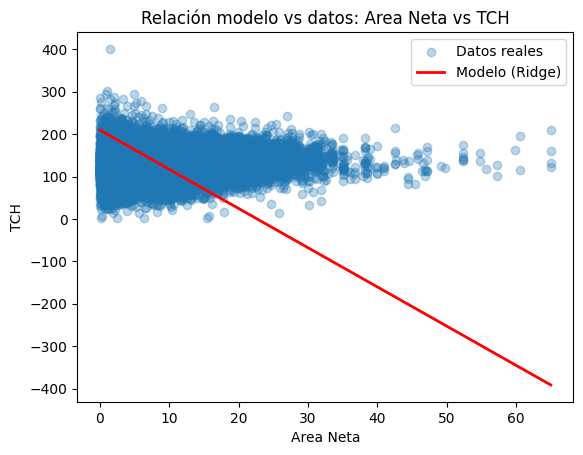

In [70]:

X_range = np.linspace(
    df_mod['Area Neta'].min(),
    df_mod['Area Neta'].max(),
    200
)

# Crear un DataFrame con todas las variables en su media/moda,
# pero variando solo dosis_madurante
X_plot = pd.DataFrame(np.tile(X_train.mean().values, (200, 1)), columns=X_train.columns)
X_plot['Area Neta'] = X_range

# Preprocesar
X_plot_prep = preprocessor.transform(X_plot)

# Predicciones usando Ridge o Lasso entrenado
y_pred = grid_search_ridge.best_estimator_.predict(X_plot_prep)

# Graficar
plt.scatter(df_mod['Area Neta'], df_mod['TCH'], alpha=0.3, label="Datos reales")
plt.plot(X_range, y_pred, color="red", linewidth=2, label="Modelo (Ridge)")
plt.xlabel("Area Neta")
plt.ylabel("TCH")
plt.title("Relación modelo vs datos: Area Neta vs TCH")
plt.legend()
plt.show()

In [117]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# ==============================
# 1. Definir features
# ==============================
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

# ==============================
# 2. Pipelines de preprocesamiento
# ==============================
# numéricas con polinomios
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),   
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # <<--- polinómico
])

# categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# combinar todo
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# ==============================
# 3. Transformar train/test
# ==============================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# ==============================
# 4. Modelos
# ==============================
# ---- Lineal ----
cv_scores_lr_mse = -cross_val_score(
    LinearRegression(),
    X_train_prep, y_train,
    cv=5,
    scoring='neg_mean_squared_error'
)
cv_scores_lr_r2 = cross_val_score(
    LinearRegression(),
    X_train_prep, y_train,
    cv=5,
    scoring='r2'
)
cv_scores_lr_rmse = np.sqrt(cv_scores_lr_mse)

lr_model = LinearRegression().fit(X_train_prep, y_train)
y_pred_lr = lr_model.predict(X_test_prep)

print("\n--- Regresión Polinómica (Lineal) ---")
print(f"MSE promedio (CV): {np.mean(cv_scores_lr_mse):.4f} (+/- {np.std(cv_scores_lr_mse):.4f})")
print(f"RMSE promedio (CV): {np.mean(cv_scores_lr_rmse):.4f} (+/- {np.std(cv_scores_lr_rmse):.4f})")
print(f"R^2 promedio (CV): {np.mean(cv_scores_lr_r2):.4f} (+/- {np.std(cv_scores_lr_r2):.4f})")
print(f"Train R²: {lr_model.score(X_train_prep, y_train):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_lr):.4f}")

# ---- Ridge ----
param_grid = {'alpha': np.logspace(-4, 2, 100)}  

grid_search_ridge = GridSearchCV(
    Ridge(),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_ridge.fit(X_train_prep, y_train)

ridge_best = grid_search_ridge.best_estimator_
y_pred_ridge = ridge_best.predict(X_test_prep)

print("\n--- Ridge (L2) ---")
print(f"Mejor alpha: {grid_search_ridge.best_params_['alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_ridge.best_score_:.4f}")
print(f"Mejor RMSE (CV): {np.sqrt(-grid_search_ridge.best_score_):.4f}")
print(f"Train R²: {ridge_best.score(X_train_prep, y_train):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_ridge):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_ridge):.4f}")

# ---- Lasso ----
grid_search_lasso = GridSearchCV(
    Lasso(),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_lasso.fit(X_train_prep, y_train)

lasso_best = grid_search_lasso.best_estimator_
y_pred_lasso = lasso_best.predict(X_test_prep)

print("\n--- Lasso (L1) ---")
print(f"Mejor alpha: {grid_search_lasso.best_params_['alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_lasso.best_score_:.4f}")
print(f"Mejor RMSE (CV): {np.sqrt(-grid_search_lasso.best_score_):.4f}")
print(f"Train R²: {lasso_best.score(X_train_prep, y_train):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_lasso):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_lasso):.4f}")


--- Regresión Polinómica (Lineal) ---
MSE promedio (CV): 744.1502 (+/- 55.3607)
RMSE promedio (CV): 27.2608 (+/- 1.0005)
R^2 promedio (CV): 0.2224 (+/- 0.0473)
Train R²: 0.4731
Test MSE: 572.8411
Test RMSE: 23.9341
Test R²: 0.2723

--- Ridge (L2) ---
Mejor alpha: 100.0000
Mejor MSE (CV): 700.0534
Mejor RMSE (CV): 26.4585
Train R²: 0.4282
Test MSE: 543.8916
Test RMSE: 23.3215
Test R²: 0.3090


KeyboardInterrupt: 

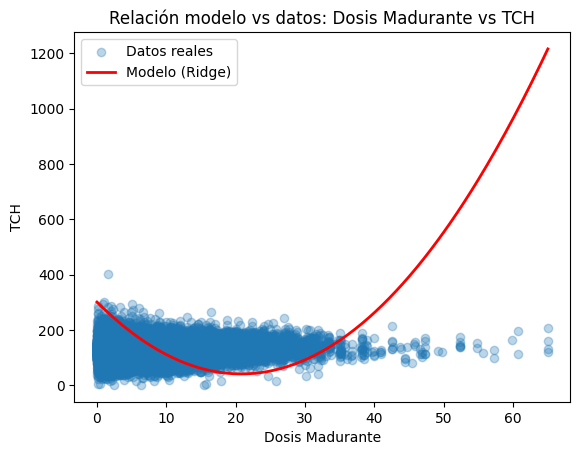

In [66]:
X_range = np.linspace(
    df_mod['Area Neta'].min(),
    df_mod['Area Neta'].max(),
    200
)

# Crear un DataFrame con todas las variables en su media/moda,
# pero variando solo dosis_madurante
X_plot = pd.DataFrame(np.tile(X_train.mean().values, (200, 1)), columns=X_train.columns)
X_plot['Area Neta'] = X_range

# Preprocesar
X_plot_prep = preprocessor.transform(X_plot)

# Predicciones usando Ridge o Lasso entrenado
y_pred = grid_search_ridge.best_estimator_.predict(X_plot_prep)

# Graficar
plt.scatter(df_mod['Area Neta'], df_mod['TCH'], alpha=0.3, label="Datos reales")
plt.plot(X_range, y_pred, color="red", linewidth=2, label="Modelo (Ridge)")
plt.xlabel("Dosis Madurante")
plt.ylabel("TCH")
plt.title("Relación modelo vs datos: Dosis Madurante vs TCH")
plt.legend()
plt.show()

In [61]:
from sklearn.linear_model import ElasticNet

# ---- Elastic Net ----
param_grid_elastic = {
    'alpha': np.logspace(-4, 2, 20),   
    'l1_ratio': np.linspace(0.1, 0.9, 9)  # mezcla entre L1 y L2
}

grid_search_elastic = GridSearchCV(
    ElasticNet(max_iter=1000),
    param_grid_elastic,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_elastic.fit(X_train_prep, y_train)

elastic_best = grid_search_elastic.best_estimator_
y_pred_elastic = elastic_best.predict(X_test_prep)

print("\n--- Elastic Net (L1 + L2) ---")
print(f"Mejor alpha: {grid_search_elastic.best_params_['alpha']:.4f}")
print(f"Mejor l1_ratio: {grid_search_elastic.best_params_['l1_ratio']:.2f}")
print(f"Mejor MSE (CV): {-grid_search_elastic.best_score_:.4f}")
print(f"Mejor RMSE (CV): {np.sqrt(-grid_search_elastic.best_score_):.4f}")
print(f"Train R²: {elastic_best.score(X_train_prep, y_train):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_elastic):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_elastic)):.4f}")
print(f"Test R²: {r2_score(y_test, y_pred_elastic):.4f}")

KeyboardInterrupt: 